In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('white')
plt.set_cmap('gist_gray')


# We also install a package to read NiFTI files
import nibabel as nib

import torch
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#This part is for figuring out which subjects in the fcp dataset are under 18

# from IPython.display import clear_output
dir_name = "../../../../shared/fcp"
fcp_directories = [x for x in os.listdir(dir_name)]
for fcp_directory in fcp_directories:
    if fcp_directory != "invalid" and fcp_directory != ".ipynb_checkpoints":

        filename = dir_name + "/" + fcp_directory + "/" + fcp_directory + "_demographics.txt"

        with open(filename) as f:
            data = f.readlines()

        f = open(filename)
        data = f.readlines()
        under18_data = []
        print("The subjects that are under 18 in",fcp_directory,"are:")
        for line in data:
            data = line.split("\t")
            if fcp_directory == "NewYork_a" or fcp_directory == "NewYork_a_ADHD":
                age = data[3]  
            else: 
                age = data[2]
            if float(age) < 18:
                under18_data.append(data)
                print(data[0],age)
        print("There are a total of", len(under18_data),"subjects.")
        f.close()


The subjects that are under 18 in Baltimore are:
There are a total of 0 subjects.
The subjects that are under 18 in Bangor are:
There are a total of 0 subjects.
The subjects that are under 18 in Beijing_Zang are:
There are a total of 0 subjects.
The subjects that are under 18 in Berlin_Margulies are:
There are a total of 0 subjects.
The subjects that are under 18 in Cambridge_Buckner are:
There are a total of 0 subjects.
The subjects that are under 18 in Dallas are:
There are a total of 0 subjects.
The subjects that are under 18 in ICBM are:
There are a total of 0 subjects.
The subjects that are under 18 in Leiden_2180 are:
There are a total of 0 subjects.
The subjects that are under 18 in Leiden_2200 are:
There are a total of 0 subjects.
The subjects that are under 18 in Leipzig are:
There are a total of 0 subjects.
The subjects that are under 18 in Milwaukee_b are:
There are a total of 0 subjects.
The subjects that are under 18 in Munchen are:
There are a total of 0 subjects.
The sub

In [3]:
#This part is for gathering all the skullstripped images in fcp dataset into one giant array
from IPython.display import clear_output
skullstripped_img_list = []
file_id = []
sample_size = 0
for fcp_directory in fcp_directories:
    sub_directories = [x for x in os.listdir(dir_name + "/" + fcp_directory) if x.startswith('sub')]
    for sub_directory in sub_directories:
        anat_directory = [x for x in os.listdir(dir_name + "/" + fcp_directory + "/" + sub_directory) if x.startswith('anat')]
        skullstripped_file_name = dir_name + "/" + fcp_directory + "/" + sub_directory + '/' + anat_directory[0] + "/" + 'mprage_skullstripped.nii.gz'
        if os.path.exists(skullstripped_file_name):
#             skullstripped_img = nib.load(skullstripped_file_name).get_data()
#             skullstripped_img_list.append(skullstripped_img)
            file_id.append(sub_directory[3:])
            sample_size += 1
            clear_output(wait=True)

# print(len(skullstripped_img_list))


In [4]:
# print(skullstripped_img_list[100].shape)
print(len(file_id))

1146


In [5]:
#This block is for finding out which subjects' information is missing in the demographics.csv file
#And save only those data where age information is available in the demographics.csv file
df = pd.read_csv('../demographics.csv')
sheet = df.values
filtered = list()
for i in range(0, len(sheet)):
    if sheet[i, 1]== 'fcp':
        filtered.append((sheet[i, 5], sheet[i, 4]))
sheet = filtered
print(sheet[0])
age = []
index = list()
new_data = []
missing = []

# for subject in sheet: 
#     subject_id.append(subject[0][-6:-1])
#     subject_age.append(subject[1])
# print(len(subject_id),len(subject_age))
    
    
for i in range(0, len(file_id)):
    in_sheet = False
    for patient in sheet: 
        if patient[0][-6:-1] == file_id[i]:
            age.append(patient[1])
            in_sheet = True
            break
    if not in_sheet:
            missing.append(i)
print(missing)

('AnnArbor_a_sub04111/', 25.63)
[465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 606, 607, 608, 609, 610, 611, 612, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916]


In [6]:
print(len(age))

1034


In [7]:
onehot_age = list()
for i in range(0, len(age)):
    current_age = int(round(age[i]))
    current_age -= 18
    one_hot = [0 for i in range(14)]
    if current_age >= 83:
        one_hot[-1] = 1
    else:
        one_hot[current_age // 5] = 1
    onehot_age.append(one_hot)
print(len(onehot_age))
age_class = np.argmax(np.asarray(onehot_age),axis=1)


1034


Text(0, 0.5, 'percentage')

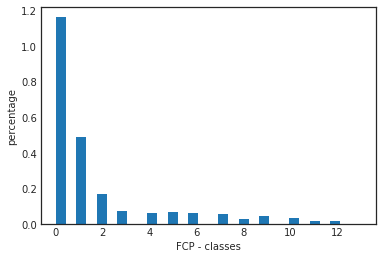

In [8]:
plt.hist(age_class,bins=30, density=True)
plt.xlabel('FCP - classes')
plt.ylabel('percentage')

In [10]:
#Saving three types of labels
# age = torch.from_numpy(np.asarray(age))
# torch.save(age,"fcp_ages.pt")
# data = torch.load("fcp_ages.pt")
# print(data.shape)

# labels_13 = torch.from_numpy(np.asarray(onehot_age))
# torch.save(labels_13,"fcp_labels_13.pt")
# data = torch.load("fcp_labels_13.pt")
# print(data.shape)

age_class = np.argmax(np.asarray(onehot_age),axis=1)
labels_15 = torch.from_numpy(age_class)
torch.save(labels_15,"../../../../data/fcp_labels_14.pt")
data = torch.load("../../../../data/fcp_labels_14.pt")
print(data.shape)

torch.Size([1034])


In [27]:
#Make sure all the data in fcp_data have corresponding age labels
# fcp_data = torch.load("../../fcp_data.pt")
# indices = []
# for i in range(fcp_data.shape[0]):
#     if i not in missing:
#         indices.append(i)
# print(len(indices))
# new_fcp_data = fcp_data[indices,:]
# print(new_fcp_data.shape)

# torch.save(new_fcp_data,"fcp_data.pt")
# data = torch.load("fcp_data.pt")
# print(data.shape)    

1034
torch.Size([1034, 3, 224, 224])
torch.Size([1034, 3, 224, 224])


In [14]:
#Slice the most central/important parts of the images (so that they have the same shape) 
#and convert the array into a tensor
import numpy as np
new_img_list = []

for i in range(len(skullstripped_img_list)):  
    d_0 = skullstripped_img_list[i].shape[0]
    d_1 = skullstripped_img_list[i].shape[1]
    d_2 = skullstripped_img_list[i].shape[2]
    new_img = skullstripped_img_list[i][:,int(d_1 / 2),:]
    if d_0 > 224:
        start_0 = int((d_0 - 224) / 2)
        new_img = new_img[start_0:start_0 + 224, :]
    else:
        if d_0 % 2 == 0:
            pad_width = int((224 - d_0) / 2)
            new_img = np.pad(np.asarray(new_img),((pad_width, pad_width),(0,0)),"constant") 
        else: 
            pad_width_0 = int((224 - d_0) / 2)
            pad_width_1 = pad_width_0 + 1
            new_img = np.pad(np.asarray(new_img),((pad_width_0, pad_width_1),(0,0)),"constant") 

    #modify the dimensions by cropping and zero-padding so that all the images' sizes become 224*224
    if d_2 > 224:
        start_2 = int((d_2 - 224) / 2)
        new_img = new_img[:,start_2:start_2 + 224]
    else:
        if d_2 % 2 == 0:
            pad_width = int((224 - d_2) / 2)
            new_img = np.pad(np.asarray(new_img),((0,0),(pad_width, pad_width)),"constant") 
        else: 
            pad_width_0 = int((224 - d_2) / 2)
            pad_width_1 = pad_width_0 + 1
            new_img = np.pad(np.asarray(new_img),((0,0),(pad_width_0, pad_width_1)),"constant") 
    final_img = np.tile(new_img,(3,1)).reshape((3,224,224))
    new_img_list.append(final_img)    
new_img_list = torch.from_numpy(np.asarray(new_img_list))
print('Shape of the MRI : {}'.format(new_img_list.shape))

#Saves the tensor
torch.save(new_img_list,"fcp_data.pt")
data = torch.load("fcp_data.pt")
print(data.shape)

Shape of the MRI : torch.Size([1146, 3, 224, 224])
torch.Size([1146, 3, 224, 224])


torch.Size([1146, 3, 224, 224])
